# Bag of Words

A Bag-of-Words (BoW) is a simple and widely used technique in Natural Language Processing (NLP) and Information Retrieval (IR) to represent text documents as numerical vectors. The idea is to treat a document as a bag, or a set, of its word occurrences, without considering the order or context of the words.

## Steps

1. Tokenization: Break down the text into individual words or tokens.
2. Stopword removal: Remove common words like "the", "and", "a", etc. that don't add much value to the meaning of the text.
3. Stemming or Lemmatization: Reduce words to their base form (e.g., "running" becomes "run").
4. Vectorization: Create a vector representation of the document by counting the frequency of each word in the document.
5. Normalization: Normalize the vector to have a fixed length, usually by dividing by the magnitude of the vector.

The resulting vector is a Bag-of-Words representation of the document, which can be used for various NLP tasks, such as:

* Text classification
* Clustering
* Information retrieval
* Sentiment analysis
* Topic modeling

The advantages of BoW include:

* Simple to implement
* Fast computation
* Scalable to large datasets

However, BoW also has some limitations:

* Ignores word order and context
* May not capture nuanced semantic relationships between words
* Can be sensitive to the choice of stopwords and stemming/lemmatization algorithms

To overcome these limitations, more advanced techniques like Term Frequency-Inverse Document Frequency (TF-IDF), Latent Semantic Analysis (LSA), and Word Embeddings (e.g., Word2Vec, GloVe) have been developed.

In [15]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.data.path.append("/content/nltk")

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/oysterable/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oysterable/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/oysterable/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Tokenization & Stop Word Removal

Create a preprocess function that can remove stop words after tokenization.


In [16]:
def preprocess(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    print(f"Text: {text.lower()}, Tokens: {tokens}") #make it lowercase

    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]

    return tokens

## Create a BoW Representation for Each Document


In [17]:
def create_bow(documents):
    # Create vocabulary
    vocab = set()
    for doc in documents:
        vocab.update(preprocess(doc))

    bow_representations = []
    for doc in documents:
        bow = Counter(preprocess(doc))
        bow_vector = [bow.get(word, 0) for word in vocab]
        bow_representations.append(bow_vector)

    return list(vocab), bow_representations

# Example usage
documents = [
    "The cat sat on the mat.",
    "The dog chased the cat.",
    "The mat was on the floor."
]

vocabulary, bow_representations = create_bow(documents)


Text: the cat sat on the mat., Tokens: ['the', 'cat', 'sat', 'on', 'the', 'mat', '.']
Text: the dog chased the cat., Tokens: ['the', 'dog', 'chased', 'the', 'cat', '.']
Text: the mat was on the floor., Tokens: ['the', 'mat', 'was', 'on', 'the', 'floor', '.']
Text: the cat sat on the mat., Tokens: ['the', 'cat', 'sat', 'on', 'the', 'mat', '.']
Text: the dog chased the cat., Tokens: ['the', 'dog', 'chased', 'the', 'cat', '.']
Text: the mat was on the floor., Tokens: ['the', 'mat', 'was', 'on', 'the', 'floor', '.']


In [18]:

print("Vocabulary:")
print(vocabulary)


Vocabulary:
['sat', 'floor', 'dog', 'cat', 'chased', 'mat']


#### -The Vocabulary is our Feature Space-

In [19]:

print("\nBag of Words representations:")
for i, bow in enumerate(bow_representations):
    print(f"Document {i + 1}: {bow}")



Bag of Words representations:
Document 1: [1, 0, 0, 1, 0, 1]
Document 2: [0, 0, 1, 1, 1, 0]
Document 3: [0, 1, 0, 0, 0, 1]


This bag of words representation is a feature set. This set is a good approximation of popular words.

## Corpus and Politics & Sports

Here is a corpus and politics & sports. Try and apply the bag of words model. What insights do you gather?

In [20]:
## Corpus of Politics & Sports

corpus = [
    "The New England Patriots won the Super Bowl last night.",
    "The Democratic Party is expected to win the presidential election.",
    "LeBron James is considered one of the greatest basketball players of all time.",
    "The Republican Party is pushing for tax reform.",
    "The Boston Red Sox are heading to the World Series.",
    "The Democratic nominee for president is a strong advocate for healthcare reform.",
    "Tom Brady is a legendary quarterback in the NFL.",
    "The Republican candidate for president is a vocal supporter of gun rights.",
    "The Chicago Cubs won the World Series in 2016.",
    "The Democratic Party is divided on the issue of immigration reform.",
    "The Golden State Warriors are a dominant force in the NBA.",
    "The Republican Party is expected to maintain control of the Senate.",
    "The New York Yankees are a storied franchise in Major League Baseball.",
    "The Democratic nominee for president is a strong supporter of LGBTQ+ rights.",
    "The Green Bay Packers are a beloved team in the NFL.",
    "The Republican candidate for president is a vocal critic of the Affordable Care Act.",
    "The Los Angeles Lakers are a storied franchise in the NBA.",
    "The Democratic Party is pushing for climate change legislation.",
    "The New York Mets are a struggling team in Major League Baseball.",
    "The Republican Party is expected to maintain control of the House of Representatives.",
    "The Boston Celtics are a storied franchise in the NBA.",
    "The Democratic nominee for president is a strong advocate for education reform.",
    "The Chicago Bears are a storied franchise in the NFL.",
    "The Republican candidate for president is a vocal supporter of the military.",
    "The Golden State Warriors are a dominant force in the NBA.",
    "The Democratic Party is divided on the issue of gun control.",
    "The New England Patriots are a dominant force in the NFL.",
    "The Republican Party is expected to maintain control of the presidency.",
    "The Los Angeles Dodgers are a storied franchise in Major League Baseball.",
    "The Democratic nominee for president is a strong supporter of women's rights.",
    "The Green Bay Packers are a beloved team in the NFL.",
    "The Republican candidate for president is a vocal critic of the Iran nuclear deal.",
    "The Boston Red Sox are a storied franchise in Major League Baseball.",
    "The Democratic Party is pushing for healthcare reform.",
    "The Republican Party is expected to maintain control of the Senate.",
    "The New York Yankees are a storied franchise in Major League Baseball.",
    "The Democratic nominee for president is a strong advocate for environmental protection.",
    "The Chicago Cubs are a storied franchise in Major League Baseball.",
    "The Republican candidate for president is a vocal supporter of the death penalty.",
    "The Los Angeles Lakers are a storied franchise in the NBA.",
    "The Democratic Party is divided on the issue of immigration reform.",
    "The Green Bay Packers are a beloved team in the NFL.",
    "The Republican Party is expected to maintain control of the House of Representatives.",
    "The Boston Celtics are a storied franchise in the NBA.",
    "The Democratic nominee for president is a strong advocate for education reform.",
    "The Chicago Bears are a storied franchise in the NFL.",
    "The Republican candidate for president is a vocal supporter of the military.",
    "The Golden State Warriors are a dominant force in the NBA.",
    "The Democratic Party is divided on the issue of gun control.",
    "The New England Patriots are a dominant force in the NFL.",
    "The Republican Party is expected to maintain control of the presidency.",
    "The Los Angeles Dodgers are a storied franchise in Major League Baseball.",
    "The Democratic nominee for president is a strong supporter of women's rights.",
    "The Green Bay Packers are a beloved team in the NFL.",
    "The Republican candidate for president is a vocal critic of the Iran nuclear deal.",
    "The Boston Red Sox are a storied franchise in Major League Baseball.",
    "The Democratic Party is pushing for healthcare reform.",
    "The Republican Party is expected to maintain control of the Senate.",
    "The New York Yankees are a storied franchise in Major League Baseball.",
    "The Democratic nominee for president is a strong advocate for environmental protection.",
    "The Chicago Cubs are a storied franchise in Major League Baseball.",
    "The Republican candidate for president is a vocal supporter of the death penalty.",
    "The Los Angeles Lakers are a storied franchise in the NBA.",
    "The Democratic Party is divided on the issue of immigration reform.",
    "The Green Bay Packers are a beloved team in the NFL.",
    "The Republican Party is expected to maintain control of the House of Representatives.",
    "The Boston Celtics are a storied franchise in the NBA.",
    "The Democratic nominee for president is a strong advocate for education reform.",
    "The Chicago Bears are a storied franchise in the NFL.",
    "The Republican candidate for president is a vocal supporter of the military.",
    "The Golden State Warriors are a dominant force in the NBA.",
    "The Democratic Party is divided on the issue of gun control.",
    "The New England Patriots are a dominant force in the NFL.",
    "The Republican Party is expected to maintain control of the presidency.",
    "The Los Angeles Dodgers are a storied franchise in Major League Baseball.",
    "The Democratic nominee for president is a strong supporter of women's rights.",
    "The Green Bay Packers are a beloved team in the NFL.",
    "The Republican candidate for president is a vocal critic of the Iran nuclear deal.",
    "The Boston Red Sox are a storied franchise in Major League Baseball.",
    "The Democratic Party is pushing for healthcare reform.",
    "The Republican Party is expected to maintain control of the Senate.",
    "The New York Yankees are a storied franchise in Major League Baseball.",
    "The Democratic nominee for president is a strong advocate for environmental protection.",
    "The Chicago Cubs are a storied franchise in Major League Baseball.",
    "The Republican candidate for president is a vocal supporter of the death penalty.",
    "The Los Angeles Lakers are a storied franchise in the NBA.",
    "The Democratic Party is divided on the issue of immigration reform.",
    "The Green Bay Packers are a beloved team in the NFL.",
    "The Republican Party is expected to maintain control of the House of Representatives.",
    "The Boston Celtics are a storied franchise in the NBA.",
    "The Democratic nominee for president is a strong advocate for education reform.",
    "The Chicago Bears are a storied franchise in the NFL.",
    "The Republican candidate for president is a vocal supporter of the military.",
    "The Golden State Warriors are a dominant force in the NBA.",
    "The Democratic Party is divided on the issue of gun control.",
    "The New England Patriots are a dominant force in the NFL.",
    "The Republican Party is expected to maintain control of the presidency.",
    "The Los Angeles Dodgers are a storied franchise in Major League Baseball.",
    "The Democratic nominee for president is a strong supporter of women's rights.",
    "The Green Bay Packers are a beloved team in the NFL.",
    "The Republican candidate for president is a vocal critic of the Iran nuclear deal.",
    "The Boston Red Sox are a storied franchise in Major League Baseball.",
    "The Democratic Party is pushing for healthcare reform.",
    "The Republican Party is expected to maintain control of the Senate.",
    "The New York Yankees are a storied franchise in Major League Baseball.",
    "The Democratic nominee for president is a strong advocate for environmental protection.",
    "The Chicago Cubs are a storied franchise in Major League Baseball.",
    "The Republican candidate for president is a vocal supporter of the death penalty.",
    "The Los Angeles Lakers are a storied franchise in the NBA.",
    "The Democratic Party is divided on the issue of immigration reform.",
    "The Green Bay Packers are a beloved team in the NFL.",
    "The Republican Party is expected to maintain control of the House of Representatives.",
    "The Boston Celtics are a storied franchise in the NBA.",
    "The Democratic nominee for president is a strong advocate for education reform.",
    "The Chicago Bears are a storied franchise in the NFL.",
    "The Republican candidate for president is a vocal supporter of the military.",
    "The Golden State Warriors are a dominant force in the NBA.",
    "The Democratic Party is divided on the issue of gun control.",
    "The New England Patriots are a dominant force in the NFL.",
    "The Republican Party is expected to maintain control of the presidency.",
    "The Los Angeles Dodgers are a storied franchise in Major League Baseball.",
    "The Democratic nominee for president is a strong supporter of women's rights.",
    "The Green Bay Packers are a beloved team in the NFL.",
    "The Republican candidate for president is a vocal critic of the Iran nuclear deal.",
    "The Boston Red Sox are a storied franchise in Major League Baseball.",
    "The Democratic Party is pushing for healthcare reform.",
    "The Republican Party is expected to maintain control of the Senate.",
    "The New York Yankees are a storied franchise in Major League Baseball.",
    "The Democratic nominee for president is a strong advocate for environmental protection.",
    "The Chicago Cubs are a storied franchise in Major League Baseball.",
    "The Republican candidate for president is a vocal supporter of the death penalty.",
    "The Los Angeles Lakers are a storied franchise in the NBA.",
    "The Democratic Party is divided on the issue of immigration reform.",
    "The Green Bay Packers are a beloved team in the NFL.",
    "The Republican Party is expected to maintain control of the House of Representatives.",
    "The Boston Celtics are a storied franchise in the NBA.",
    "The Democratic nominee for president is a strong advocate for education reform.",
    "The Chicago Bears are a storied franchise in the NFL."]

In [21]:
vocabulary, bow_representations = create_bow(corpus)

Text: the new england patriots won the super bowl last night., Tokens: ['the', 'new', 'england', 'patriots', 'won', 'the', 'super', 'bowl', 'last', 'night', '.']
Text: the democratic party is expected to win the presidential election., Tokens: ['the', 'democratic', 'party', 'is', 'expected', 'to', 'win', 'the', 'presidential', 'election', '.']
Text: lebron james is considered one of the greatest basketball players of all time., Tokens: ['lebron', 'james', 'is', 'considered', 'one', 'of', 'the', 'greatest', 'basketball', 'players', 'of', 'all', 'time', '.']
Text: the republican party is pushing for tax reform., Tokens: ['the', 'republican', 'party', 'is', 'pushing', 'for', 'tax', 'reform', '.']
Text: the boston red sox are heading to the world series., Tokens: ['the', 'boston', 'red', 'sox', 'are', 'heading', 'to', 'the', 'world', 'series', '.']
Text: the democratic nominee for president is a strong advocate for healthcare reform., Tokens: ['the', 'democratic', 'nominee', 'for', 'presid

In [22]:
print("Vocabulary:")
print(vocabulary)


Vocabulary:
['packers', 'nuclear', 'nfl', 'cubs', 'bay', 'death', 'presidential', 'reform', 'force', 'healthcare', 'york', 'rights', 'los', 'legendary', 'struggling', 'dodgers', 'care', 'presidency', 'act', 'deal', 'state', 'super', 'baseball', 'house', 'nominee', 'james', 'penalty', 'basketball', 'issue', 'quarterback', 'democratic', 'republican', 'night', 'control', 'bears', 'league', 'series', 'gun', 'franchise', 'nba', 'affordable', 'candidate', 'new', 'time', 'heading', 'storied', 'strong', 'women', 'pushing', 'major', 'sox', 'chicago', 'party', 'one', 'divided', 'climate', 'vocal', 'golden', 'change', 'mets', 'expected', 'critic', 'greatest', 'players', 'dominant', 'education', 'england', 'environmental', 'president', 'supporter', 'last', 'tax', 'immigration', 'green', 'iran', 'military', 'angeles', 'senate', 'world', 'beloved', 'patriots', 'warriors', 'celtics', 'protection', 'representatives', 'advocate', 'legislation', 'team', 'bowl', 'lakers', 'considered', 'brady', 'tom', 'b

In [23]:
print("\nBag of Words representations:")
for i, bow in enumerate(bow_representations):
    print(f"Document {i + 1}: {bow}")


Bag of Words representations:
Document 1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Document 2: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
Document 3: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Document 4: [0, 0, 0, 0, 0, 0,

In [24]:
import pandas as pd

bow_df = pd.DataFrame(bow_representations,columns=vocabulary)
bow_df

,packers,nuclear,nfl,cubs,bay,death,presidential,reform,force,healthcare,...,considered,brady,tom,boston,election,win,maintain,yankees,lebron,red
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
136,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


array([[<Axes: title={'center': 'packers'}>,
        <Axes: title={'center': 'nuclear'}>,
        <Axes: title={'center': 'nfl'}>,
        <Axes: title={'center': 'cubs'}>,
        <Axes: title={'center': 'bay'}>,
        <Axes: title={'center': 'death'}>,
        <Axes: title={'center': 'presidential'}>,
        <Axes: title={'center': 'reform'}>,
        <Axes: title={'center': 'force'}>,
        <Axes: title={'center': 'healthcare'}>],
       [<Axes: title={'center': 'york'}>,
        <Axes: title={'center': 'rights'}>,
        <Axes: title={'center': 'los'}>,
        <Axes: title={'center': 'legendary'}>,
        <Axes: title={'center': 'struggling'}>,
        <Axes: title={'center': 'dodgers'}>,
        <Axes: title={'center': 'care'}>,
        <Axes: title={'center': 'presidency'}>,
        <Axes: title={'center': 'act'}>,
        <Axes: title={'center': 'deal'}>],
       [<Axes: title={'center': 'state'}>,
        <Axes: title={'center': 'super'}>,
        <Axes: title={'center'

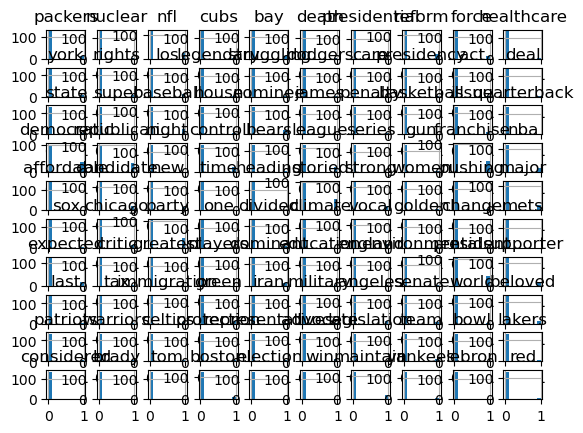

In [25]:
# bow_df.hist()

In [26]:
bow_df.value_counts()

packers  nuclear  nfl  cubs  bay  death  presidential  reform  force  healthcare  york  rights  los  legendary  struggling  dodgers  care  presidency  act  deal  state  super  baseball  house  nominee  james  penalty  basketball  issue  quarterback  democratic  republican  night  control  bears  league  series  gun  franchise  nba  affordable  candidate  new  time  heading  storied  strong  women  pushing  major  sox  chicago  party  one  divided  climate  vocal  golden  change  mets  expected  critic  greatest  players  dominant  education  england  environmental  president  supporter  last  tax  immigration  green  iran  military  angeles  senate  world  beloved  patriots  warriors  celtics  protection  representatives  advocate  legislation  team  bowl  lakers  considered  brady  tom  boston  election  win  maintain  yankees  lebron  red
1        0        1    0     1    0      0             0       0      0           0     0       0    0          0           0        0     0       

In [28]:
bow_df.rights.value_counts()

0    131
1      7
Name: rights, dtype: int64